In [10]:
import os
import glob
import re
import numpy as np 


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generador_entrenamiento = ImageDataGenerator()
datos_entrenamiento = generador_entrenamiento.flow_from_directory("Data/Train/",
target_size=(256, 256),
batch_size=(32),
class_mode='categorical'
)
generador_test = ImageDataGenerator()
datos_test = generador_test.flow_from_directory("Data/Test/",
target_size=(256, 256),
batch_size=(32),
class_mode='categorical'
)

algunas_imagenes = next(datos_test)

print(algunas_imagenes[1])

Found 133 images belonging to 7 classes.
Found 7 images belonging to 7 classes.
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


<function matplotlib.pyplot.show(close=None, block=None)>

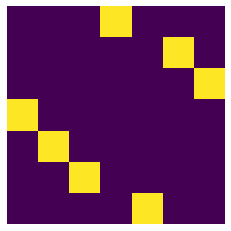

In [23]:
from matplotlib import pyplot as plt
plt.imshow(algunas_imagenes[1]/255.)
plt.axis('off')
plt.show


In [3]:

from tensorflow.keras import applications
inception = applications.InceptionV3(include_top=False, input_shape=(256, 256, 3))

In [8]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import  Sequential
predictor =Sequential([
    Flatten(),
    Dense(128,activation="relu"),
    Dense(7,activation="softmax")
])
modelo =Sequential([inception,predictor])
modelo.compile(optimizer="adam",loss="categorical_crossentropy")

In [9]:
# Entrenamiento red neuronal
modelo.fit(datos_entrenamiento,epochs=50)

Epoch 1/50
5/5 [==============================] - 137s 18s/step - loss: 24.3525
Epoch 2/50
5/5 [==============================] - 99s 18s/step - loss: 2.5314
Epoch 3/50
5/5 [==============================] - 122s 30s/step - loss: 2.4048
Epoch 4/50
5/5 [==============================] - 128s 22s/step - loss: 2.2430
Epoch 5/50
5/5 [==============================] - 112s 22s/step - loss: 1.8552
Epoch 6/50
5/5 [==============================] - 98s 18s/step - loss: 1.6661
Epoch 7/50
5/5 [==============================] - 85s 16s/step - loss: 1.5227
Epoch 8/50
5/5 [==============================] - 81s 15s/step - loss: 1.3287
Epoch 9/50
5/5 [==============================] - 82s 16s/step - loss: 1.3064
Epoch 10/50
5/5 [==============================] - 95s 16s/step - loss: 1.0896
Epoch 11/50
5/5 [==============================] - 89s 17s/step - loss: 1.2837
Epoch 12/50
5/5 [==============================] - 98s 18s/step - loss: 1.3629
Epoch 13/50
5/5 [==============================] - 98s 1

In [18]:
# prueba 
probs = modelo.predict(datos_test)
clase =np.argmax(probs,-1)


1/1 [==============================] - 4s 4s/step


In [20]:
algunas_imagenes=next(datos_test)
    

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'